**Introduction**- We have Sales data on a daily level from 2016 to 2018 and we have clasification fields as well like areas,sales region which gives granularity to our data from which we can see the sales amount for each of these classes.

We want to forecast the sales amount for each region there are five regions. They are many forecasting models available to forecast with like ARIMA,SARIMAX,Naive but we have decided to go ahead with LSTM due to many instances it has been proven that it has outperformed other univariate models 

**Importing Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\Asus\\Desktop\\SalesDetail_Final.csv")

In [3]:
df.head()

,Year,Quarter,Month,Week,Date,IsConditionalPO,AccountID,Forecastcategory,Soldtopartner,Opportunityid,...,Area,Sales_Rep_Geo,Region,Discount_Category,Organization,Product_Type,Service_Period,Part_Num,Account_Coverage_type,Sales_Amount
0,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,System Integrator,0063300000gBiwRAAS,...,Central,Americas,US - North Central,A,Americas,Product,NaN,CXA-07070,Private Sector,0.00
1,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,System Integrator,0063300000gBiwRAAS,...,Central,Americas,US - North Central,A,Americas,Product,NaN,CXA-07070-CTO,Private Sector,0.00
2,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,System Integrator,0063300000gBiwRAAS,...,Central,Americas,US - North Central,A,Americas,Product,NaN,LIC-CXA-07070-L,Private Sector,5850.00
3,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,System Integrator,0063300000gBiwRAAS,...,Central,Americas,US - North Central,A,Americas,Product,NaN,NIC-1-001G-4TX-BP-C,Private Sector,856.05
4,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,System Integrator,0063300000gBiwRAAS,...,Central,Americas,US - North Central,A,Americas,Product,NaN,OS-DEFAULT,Private Sector,0.00


In [4]:
df.columns

Index(['Year', 'Quarter', 'Month', 'Week', 'Date', 'IsConditionalPO',
       'AccountID', 'Forecastcategory', 'Soldtopartner', 'Opportunityid',
       'Closedate', 'DiscountType', 'Order_Number', 'Area', 'Sales_Rep_Geo',
       'Region', 'Discount_Category', 'Organization', 'Product_Type',
       'Service_Period', 'Part_Num', 'Account_Coverage_type', 'Sales_Amount'],
      dtype='object')

In [5]:
df.isnull().sum()

Year                          0
Quarter                       0
Month                         0
Week                          0
Date                          0
IsConditionalPO               0
AccountID                     0
Forecastcategory              0
Soldtopartner              9577
Opportunityid                 0
Closedate                     0
DiscountType              17269
Order_Number                  0
Area                          1
Sales_Rep_Geo                 0
Region                        1
Discount_Category        153604
Organization                  0
Product_Type                812
Service_Period           343447
Part_Num                      0
Account_Coverage_type     29532
Sales_Amount                  0
dtype: int64

**Data Exploration and EDA**

* We have analysed our data with help of eight plots first 
* We have used histogram to count the values in the Sales Amount
* Line Plot for amount spent with respect to a particular region
* A pie plot to check distribution of Sales Amount in percentage with respect to Region
* Also Bar plots and pie plots to check distribution of Sales Amount with respect to various parameters like month,year
  and quarter to analyise our sales in much proper way

In [6]:
df=df.drop(['Discount_Category','Account_Coverage_type','DiscountType','Soldtopartner','Service_Period','Product_Type'],axis=1)

In [7]:
df.shape

(387032, 17)

In [8]:
df.head(10)

,Year,Quarter,Month,Week,Date,IsConditionalPO,AccountID,Forecastcategory,Opportunityid,Closedate,Order_Number,Area,Sales_Rep_Geo,Region,Organization,Part_Num,Sales_Amount
0,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,567993,Central,Americas,US - North Central,Americas,CXA-07070,0.00
1,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,567993,Central,Americas,US - North Central,Americas,CXA-07070-CTO,0.00
2,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,567993,Central,Americas,US - North Central,Americas,LIC-CXA-07070-L,5850.00
3,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,567993,Central,Americas,US - North Central,Americas,NIC-1-001G-4TX-BP-C,856.05
4,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,567993,Central,Americas,US - North Central,Americas,OS-DEFAULT,0.00
5,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,567993,Central,Americas,US - North Central,Americas,PWR-CORD-UK,0.00
6,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,567993,Central,Americas,US - North Central,Americas,OC-CARD-1G-4TX-BP,0.00
7,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,567993,Central,Americas,US - North Central,Americas,OC-CXA-07070-BASE,0.00
8,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,567993,Central,Americas,US - North Central,Americas,OC-LIC-CXA-07070,0.00
9,2016,2016 Q 1,2016 / 01,2016 Week02,1/3/16 0:00,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,567993,Central,Americas,US - North Central,Americas,OC-OSVERSION,0.00


In [9]:
df.dtypes

Year                  int64
Quarter              object
Month                object
Week                 object
Date                 object
IsConditionalPO      object
AccountID            object
Forecastcategory     object
Opportunityid        object
Closedate            object
Order_Number          int64
Area                 object
Sales_Rep_Geo        object
Region               object
Organization         object
Part_Num             object
Sales_Amount        float64
dtype: object

In [10]:
# change the invoice_date format - String to Timestamp format
df['Date'] = pd.to_datetime(df.Date)


In [11]:
df['day'] = df.Date.dt.day

df['month'] = df.Date.dt.month

df["year"]= df.Date.dt.year

In [12]:
df.head()

,Year,Quarter,Month,Week,Date,IsConditionalPO,AccountID,Forecastcategory,Opportunityid,Closedate,Order_Number,Area,Sales_Rep_Geo,Region,Organization,Part_Num,Sales_Amount,day,month,year
0,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,567993,Central,Americas,US - North Central,Americas,CXA-07070,0.00,3,1,2016
1,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,567993,Central,Americas,US - North Central,Americas,CXA-07070-CTO,0.00,3,1,2016
2,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,567993,Central,Americas,US - North Central,Americas,LIC-CXA-07070-L,5850.00,3,1,2016
3,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,567993,Central,Americas,US - North Central,Americas,NIC-1-001G-4TX-BP-C,856.05,3,1,2016
4,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,567993,Central,Americas,US - North Central,Americas,OS-DEFAULT,0.00,3,1,2016


In [13]:
df['Sales_Amount'].describe()

count    387032.000000
mean        651.946154
std        1541.684620
min           0.000000
25%           0.000000
50%           0.000000
75%         169.200000
max        8000.000000
Name: Sales_Amount, dtype: float64

Text(0, 0.5, 'Frequency')

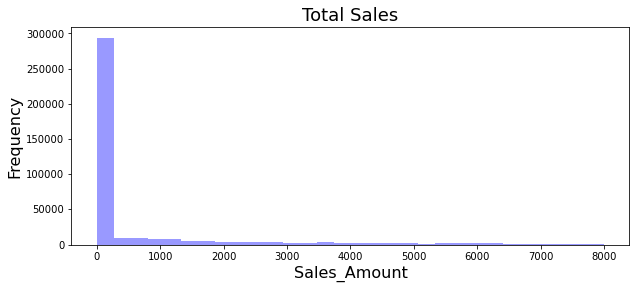

In [14]:
plt.figure(figsize=(10,4))
sns.distplot(df['Sales_Amount'], kde=False, color='blue', bins=30)
plt.title('Total Sales', fontsize=18)
plt.xlabel('Sales_Amount', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

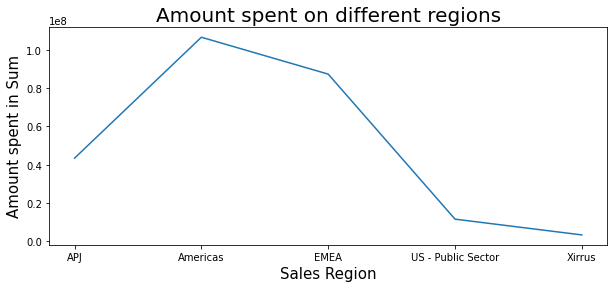

In [16]:
amount_spent_1 = df.groupby(by=['Sales_Rep_Geo'], as_index=False)['Sales_Amount'].sum()

plt.subplots(figsize=(10,4))
plt.plot(amount_spent_1.Sales_Rep_Geo, amount_spent_1.Sales_Amount)
plt.xlabel('Sales Region',fontsize=15)
plt.ylabel('Amount spent in Sum',fontsize=15)
plt.title('Amount spent on different regions',fontsize=20)
plt.show()

In [17]:
amount_spent_1.head()

,Sales_Rep_Geo,Sales_Amount
0,APJ,4.343179e+07
1,Americas,1.067140e+08
2,EMEA,8.741524e+07
3,US - Public Sector,1.150834e+07
4,Xirrus,3.254633e+06


In [18]:
df['year'].value_counts()

2018    151121
2016    126028
2017    109883
Name: year, dtype: int64

In [19]:
region_sales = df.groupby("Area")["Sales_Amount"].sum()

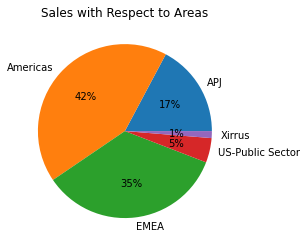

In [20]:
sales_with=df.groupby("Sales_Rep_Geo")["Sales_Amount"].sum()
plt.figure(figsize=(10,4))
plt.pie(sales_with,autopct="%1.0f%%",labels=["APJ","Americas","EMEA","US-Public Sector","Xirrus"])
plt.title("Sales with Respect to Areas")
plt.show()

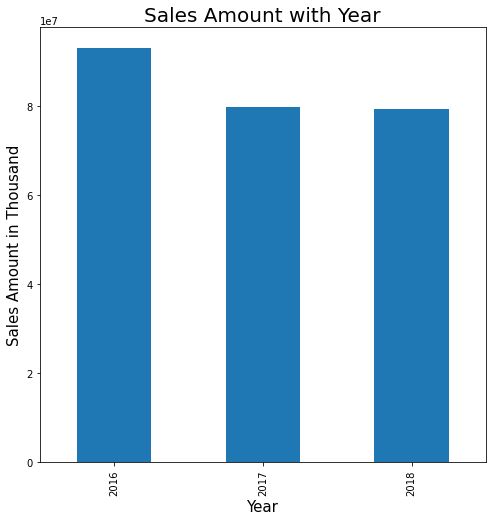

In [21]:
sales_with_year=df.groupby("year")["Sales_Amount"].sum()

plt.figure(figsize=(10,4))
sales_with_year.plot(kind="bar",figsize=(8,8))
plt.ylabel('Sales Amount in Thousand',fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.title("Sales Amount with Year",fontsize=20)
plt.show()

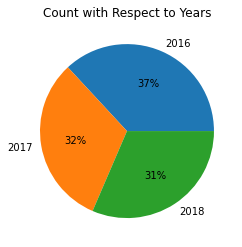

In [22]:
plt.figure(figsize=(10,4))
plt.pie(sales_with_year,autopct="%1.0f%%",labels=["2016","2017","2018"])
plt.title("Count with Respect to Years")
plt.show()

In [23]:
quarter = []
for x in df['month'] :
    
    if x in [1,2,3]:
        quarter.append("Q1")
    elif x in [4,5,6]:
        quarter.append("Q2")
    elif x in [7,8,9]:
        quarter.append("Q3")
    else:
        quarter.append("Q4")

In [24]:
df["quarter"]=pd.Series(quarter)

In [25]:
df.head()

,Year,Quarter,Month,Week,Date,IsConditionalPO,AccountID,Forecastcategory,Opportunityid,Closedate,...,Area,Sales_Rep_Geo,Region,Organization,Part_Num,Sales_Amount,day,month,year,quarter
0,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,...,Central,Americas,US - North Central,Americas,CXA-07070,0.00,3,1,2016,Q1
1,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,...,Central,Americas,US - North Central,Americas,CXA-07070-CTO,0.00,3,1,2016,Q1
2,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,...,Central,Americas,US - North Central,Americas,LIC-CXA-07070-L,5850.00,3,1,2016,Q1
3,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,...,Central,Americas,US - North Central,Americas,NIC-1-001G-4TX-BP-C,856.05,3,1,2016,Q1
4,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,...,Central,Americas,US - North Central,Americas,OS-DEFAULT,0.00,3,1,2016,Q1


In [26]:
sales_quarter = df.groupby(["quarter"])['Sales_Amount'].sum()



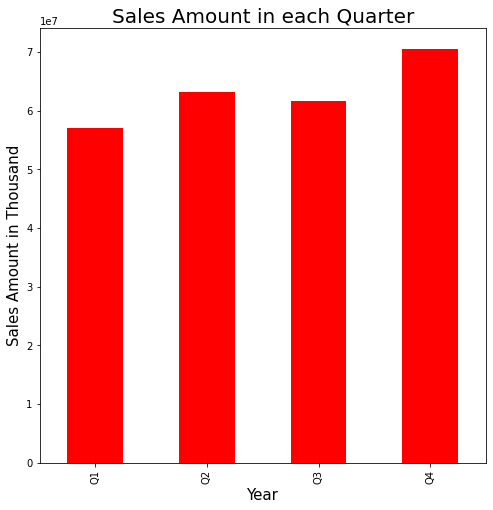

In [27]:
plt.figure(figsize=(10,4))
sales_quarter.plot(kind="bar",figsize=(8,8),color='red')
plt.ylabel('Sales Amount in Thousand',fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.title("Sales Amount in each Quarter",fontsize=20)
plt.show()

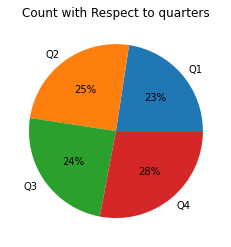

In [28]:
plt.figure(figsize=(10,4))
plt.pie(sales_quarter,autopct="%1.0f%%",labels=["Q1","Q2","Q3","Q4"])
plt.title("Count with Respect to quarters")
plt.show()

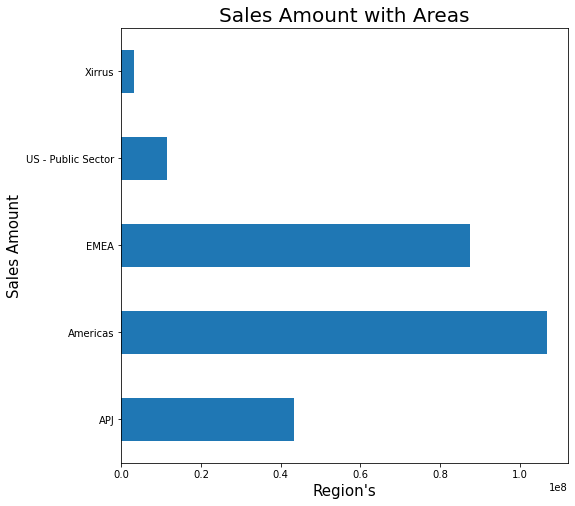

In [29]:
plt.figure(figsize=(10,4))
sales_with.plot(kind="barh",figsize=(8,8))
plt.ylabel('Sales Amount',fontsize=15)
plt.xlabel("Region's",fontsize=15)
plt.title("Sales Amount with Areas",fontsize=20)
plt.show()

In [ ]:
#divide entire data in five dataframes acc to area
#for each area we need to do dist of sales amount 
#for each area line plot for all historical values


#Forecasting for next 30 days using LSTM 
#LSTM code for each area

In [ ]:
def region(df):
    
    f

In [40]:
df_Americas=df[df["Sales_Rep_Geo"]=="Americas"]

In [41]:
df_Americas

,Year,Quarter,Month,Week,Date,IsConditionalPO,AccountID,Forecastcategory,Opportunityid,Closedate,...,Area,Sales_Rep_Geo,Region,Organization,Part_Num,Sales_Amount,day,month,year,quarter
0,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,...,Central,Americas,US - North Central,Americas,CXA-07070,0.00,3,1,2016,Q1
1,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,...,Central,Americas,US - North Central,Americas,CXA-07070-CTO,0.00,3,1,2016,Q1
2,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,...,Central,Americas,US - North Central,Americas,LIC-CXA-07070-L,5850.00,3,1,2016,Q1
3,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,...,Central,Americas,US - North Central,Americas,NIC-1-001G-4TX-BP-C,856.05,3,1,2016,Q1
4,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,...,Central,Americas,US - North Central,Americas,OS-DEFAULT,0.00,3,1,2016,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387027,2018,2018 Q 4,2018 / 12,2018 Week53,2018-12-31,N,001A000000StB7cIAF,Closed,0060b00000pkvQXAAY,12/31/18 0:00,...,West,Americas,US - Pacific West,Americas,OC-SCAN-ASA,0.00,31,12,2018,Q4
387028,2018,2018 Q 4,2018 / 12,2018 Week53,2018-12-31,N,001A000000StB7cIAF,Closed,0060b00000pkvQXAAY,12/31/18 0:00,...,West,Americas,US - Pacific West,Americas,OC-SCFG-VE-PTO,0.00,31,12,2018,Q4
387029,2018,2018 Q 4,2018 / 12,2018 Week53,2018-12-31,N,001A000000StB7cIAF,Closed,0060b00000pkvQXAAY,12/31/18 0:00,...,West,Americas,US - Pacific West,Americas,OC-SCNP-VE-PTO,0.00,31,12,2018,Q4
387030,2018,2018 Q 4,2018 / 12,2018 Week53,2018-12-31,N,001A000000StB7cIAF,Closed,0060b00000pkvQXAAY,12/31/18 0:00,...,West,Americas,US - Pacific West,Americas,OC-SCPRTL,0.00,31,12,2018,Q4


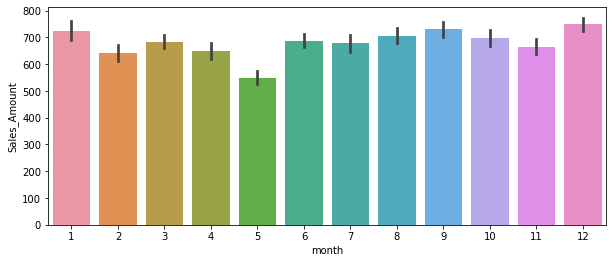

In [80]:
plt.figure(figsize=(10,4))
sns.barplot(x="month",y='Sales_Amount',data=df_Americas)

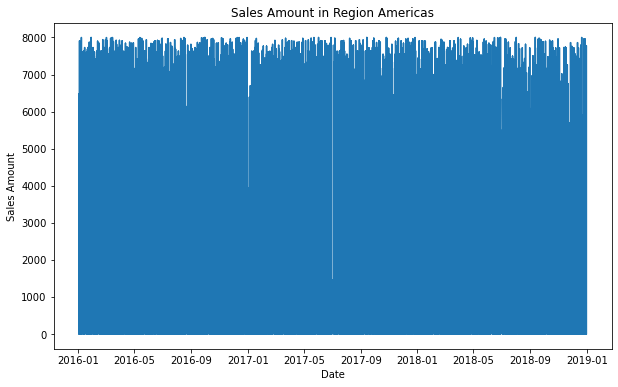

In [54]:
plt.figure(figsize=(10,6))
plt.title('Sales Amount in Region Americas')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.plot(df_Americas["Date"],df_Americas["Sales_Amount"]);


In [51]:
df_APJ=df[df["Sales_Rep_Geo"]=="APJ"]

In [82]:
df_APJ.head()

,Year,Quarter,Month,Week,Date,IsConditionalPO,AccountID,Forecastcategory,Opportunityid,Closedate,...,Area,Sales_Rep_Geo,Region,Organization,Part_Num,Sales_Amount,day,month,year,quarter
11,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,...,South Asia,APJ,South Asia,APJ,CXA-07070,0.00,3,1,2016,Q1
12,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,...,South Asia,APJ,South Asia,APJ,CXA-07070-CTO,0.00,3,1,2016,Q1
13,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,...,South Asia,APJ,South Asia,APJ,LIC-CXA-07070-L,1950.00,3,1,2016,Q1
14,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,...,South Asia,APJ,South Asia,APJ,NIC-1-001G-4TX-BP-C,285.35,3,1,2016,Q1
15,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000000EcWKAA0,Closed,0063300000gBiwRAAS,1/3/16 0:00,...,South Asia,APJ,South Asia,APJ,OS-DEFAULT,0.00,3,1,2016,Q1


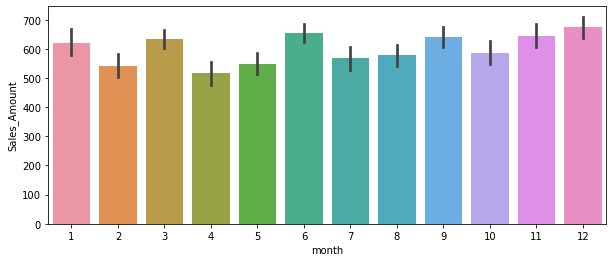

In [81]:
plt.figure(figsize=(10,4))
sns.barplot(x="month",y='Sales_Amount',data=df_APJ)

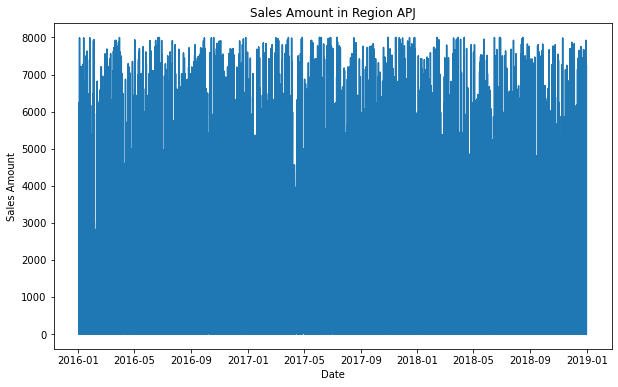

In [55]:
plt.figure(figsize=(10,6))
plt.title('Sales Amount in Region APJ')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.plot(df_APJ["Date"],df_APJ["Sales_Amount"]);


In [56]:
df_EMEA=df[df["Sales_Rep_Geo"]=="EMEA"]

In [83]:
df_EMEA.head()

,Year,Quarter,Month,Week,Date,IsConditionalPO,AccountID,Forecastcategory,Opportunityid,Closedate,...,Area,Sales_Rep_Geo,Region,Organization,Part_Num,Sales_Amount,day,month,year,quarter
53,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000006UUQzAAO,Closed,0063300000hVmGrAAK,1/3/16 0:00,...,UK&I,EMEA,UK&I 1,EMEA,CMC-SWA-MGT-PTO,0.0000,3,1,2016,Q1
54,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000006UUQzAAO,Closed,0063300000hVmGrAAK,1/3/16 0:00,...,UK&I,EMEA,UK&I 1,EMEA,CXA-00570-PTO,0.0000,3,1,2016,Q1
55,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000006UUQzAAO,Closed,0063300000hVmGrAAK,1/3/16 0:00,...,UK&I,EMEA,UK&I 1,EMEA,CXA-03070-B010,3299.3125,3,1,2016,Q1
56,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000006UUQzAAO,Closed,0063300000hVmGrAAK,1/3/16 0:00,...,UK&I,EMEA,UK&I 1,EMEA,CXA-03070-PTO,0.0000,3,1,2016,Q1
57,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-03,N,00130000006UUQzAAO,Closed,0063300000hVmGrAAK,1/3/16 0:00,...,UK&I,EMEA,UK&I 1,EMEA,LIC-CXA-03070-L,343.7500,3,1,2016,Q1


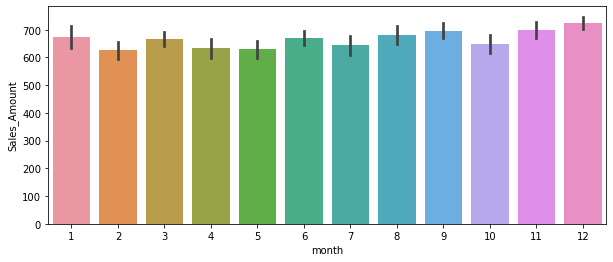

In [84]:
plt.figure(figsize=(10,4))
sns.barplot(x="month",y='Sales_Amount',data=df_EMEA)

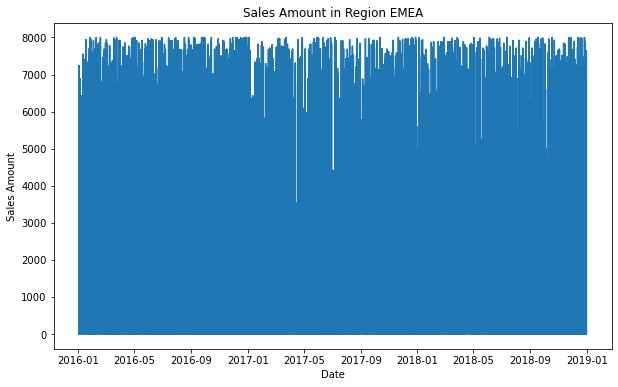

In [59]:
plt.figure(figsize=(10,6))
plt.title('Sales Amount in Region EMEA')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.plot(df_EMEA["Date"],df_EMEA["Sales_Amount"]);


In [69]:
df_US_Public_Sector=df[df["Sales_Rep_Geo"]=="US - Public Sector"]

In [70]:
df_US_Public_Sector

,Year,Quarter,Month,Week,Date,IsConditionalPO,AccountID,Forecastcategory,Opportunityid,Closedate,...,Area,Sales_Rep_Geo,Region,Organization,Part_Num,Sales_Amount,day,month,year,quarter
390,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-04,N,00130000004XVoxAAG,Closed,0064000000eZ0PQAA0,1/4/16 0:00,...,Public Sector,US - Public Sector,US - Federal Intel/FSI,US - Public Sector,NETCBASE-PTO,0.00,4,1,2016,Q1
391,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-04,N,00130000004XVoxAAG,Closed,0064000000eZ0PQAA0,1/4/16 0:00,...,Public Sector,US - Public Sector,US - Federal Intel/FSI,US - Public Sector,MNT-NCCFG-M,6325.88,4,1,2016,Q1
392,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-04,N,00130000004XVoxAAG,Closed,0064000000eZ0PQAA0,1/4/16 0:00,...,Public Sector,US - Public Sector,US - Federal Intel/FSI,US - Public Sector,MNT-NCPOLL-M,4214.30,4,1,2016,Q1
393,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-04,N,00130000004XVoxAAG,Closed,0064000000eZ0PQAA0,1/4/16 0:00,...,Public Sector,US - Public Sector,US - Federal Intel/FSI,US - Public Sector,MNT-NETCBASE,700.90,4,1,2016,Q1
394,2016,2016 Q 1,2016 / 01,2016 Week02,2016-01-04,N,00130000004XVoxAAG,Closed,0064000000eZ0PQAA0,1/4/16 0:00,...,Public Sector,US - Public Sector,US - Federal Intel/FSI,US - Public Sector,NCCFG-M,0.00,4,1,2016,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386061,2018,2018 Q 4,2018 / 12,2018 Week52,2018-12-28,N,0017000000WLBU0AAP,Closed,0063300000le2MwAAI,12/28/18 0:00,...,Public Sector,US - Public Sector,US - Federal Civilian,US - Public Sector,OC-OSVERSION,0.00,28,12,2018,Q4
386062,2018,2018 Q 4,2018 / 12,2018 Week52,2018-12-28,N,0017000000WLBU0AAP,Closed,0063300000le2MwAAI,12/28/18 0:00,...,Public Sector,US - Public Sector,US - Federal Civilian,US - Public Sector,OC-POWERCORD-1PS,0.00,28,12,2018,Q4
386063,2018,2018 Q 4,2018 / 12,2018 Week52,2018-12-28,N,0017000000WLBU0AAP,Closed,0063300000le2MwAAI,12/28/18 0:00,...,Public Sector,US - Public Sector,US - Federal Civilian,US - Public Sector,OC-POWERCORD-2PS,0.00,28,12,2018,Q4
386064,2018,2018 Q 4,2018 / 12,2018 Week52,2018-12-28,N,0017000000WLBU0AAP,Closed,0063300000le2MwAAI,12/28/18 0:00,...,Public Sector,US - Public Sector,US - Federal Civilian,US - Public Sector,OC-SCC-01000-BASE,0.00,28,12,2018,Q4


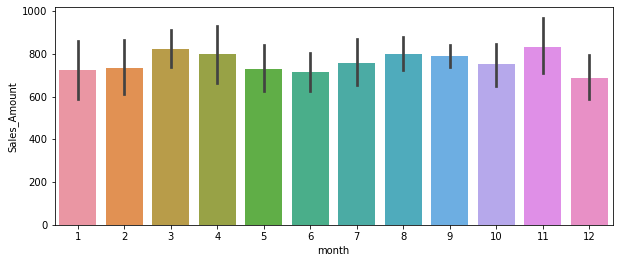

In [85]:
plt.figure(figsize=(10,4))
sns.barplot(x="month",y='Sales_Amount',data=df_US_Public_Sector)

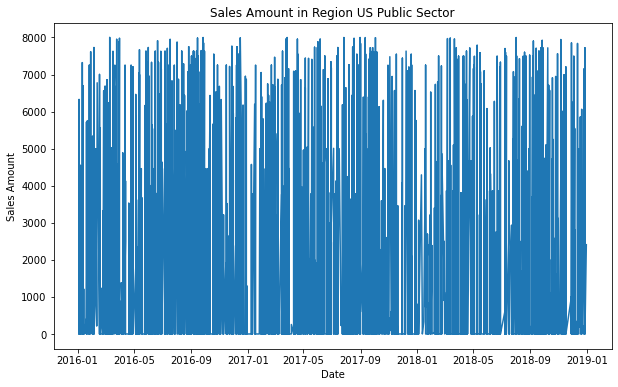

In [77]:
plt.figure(figsize=(10,6))
plt.title('Sales Amount in Region US Public Sector')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.plot(df_US_Public_Sector["Date"],df_US_Public_Sector["Sales_Amount"]);


In [73]:
df_Xirrus=df[df["Sales_Rep_Geo"]=="Xirrus"]

In [74]:
df_Xirrus

,Year,Quarter,Month,Week,Date,IsConditionalPO,AccountID,Forecastcategory,Opportunityid,Closedate,...,Area,Sales_Rep_Geo,Region,Organization,Part_Num,Sales_Amount,day,month,year,quarter
237556,2018,2018 Q 1,2018 / 01,2018 Week02,2018-01-11,N,0010b00001sq96KAAQ,Closed,0060b00000mOeAFAA0,1/11/18 0:00,...,Xirrus-Americas,Xirrus,Xirrus-Americas-Inside,Xirrus,PWR-CORD-US,0.00,11,1,2018,Q1
237557,2018,2018 Q 1,2018 / 01,2018 Week02,2018-01-11,N,0010b00001sq96KAAQ,Closed,0060b00000mOeAFAA0,1/11/18 0:00,...,Xirrus-Americas,Xirrus,Xirrus-Americas-Inside,Xirrus,XP8-MSI-70M-PTO,0.00,11,1,2018,Q1
237558,2018,2018 Q 1,2018 / 01,2018 Week02,2018-01-11,N,0010b00001sq96KAAQ,Closed,0060b00000mOeAFAA0,1/11/18 0:00,...,Xirrus-Americas,Xirrus,Xirrus-Americas-Inside,Xirrus,MNT-GLD-XP8-MSI,13.74,11,1,2018,Q1
237559,2018,2018 Q 1,2018 / 01,2018 Week02,2018-01-11,N,0010b00001sq96KAAQ,Closed,0060b00000mOeAFAA0,1/11/18 0:00,...,Xirrus-Americas,Xirrus,Xirrus-Americas-Inside,Xirrus,XP8-MSI-70M,715.50,11,1,2018,Q1
237560,2018,2018 Q 1,2018 / 01,2018 Week02,2018-01-11,N,0010b00001sq96KAAQ,Closed,0060b00000mOeAFAA0,1/11/18 0:00,...,Xirrus-Americas,Xirrus,Xirrus-Americas-Inside,Xirrus,OC-POWER-XP8-INJECTOR-PTO,0.00,11,1,2018,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343201,2018,2018 Q 3,2018 / 09,2018 Week37,2018-09-13,N,0010b00001sqPS8AAM,Closed,0060b00000mPlXuAAK,3/20/18 0:00,...,Xirrus-Americas,Xirrus,Xirrus-Americas-Inside,Xirrus,OC-X2-120-BASE,0.00,13,9,2018,Q3
345517,2018,2018 Q 3,2018 / 09,2018 Week38,2018-09-19,N,0010b00001sqNy3AAE,Closed,0060b00000mPnEuAAK,5/25/18 0:00,...,Xirrus-Americas,Xirrus,Xirrus-Americas-Inside,Xirrus,AOS-APPCON,0.00,19,9,2018,Q3
345518,2018,2018 Q 3,2018 / 09,2018 Week38,2018-09-19,N,0010b00001sqNy3AAE,Closed,0060b00000mPnEuAAK,5/25/18 0:00,...,Xirrus-Americas,Xirrus,Xirrus-Americas-Inside,Xirrus,LIC-AOS-1,0.00,19,9,2018,Q3
345519,2018,2018 Q 3,2018 / 09,2018 Week38,2018-09-19,N,0010b00001sqNy3AAE,Closed,0060b00000mPnEuAAK,5/25/18 0:00,...,Xirrus-Americas,Xirrus,Xirrus-Americas-Inside,Xirrus,XD2-240,0.00,19,9,2018,Q3


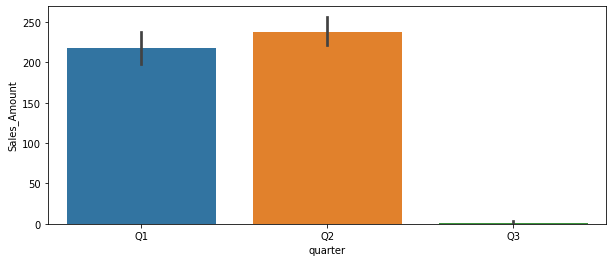

In [75]:
plt.figure(figsize=(10,4))
sns.barplot(x="quarter",y='Sales_Amount',data=df_Xirrus)

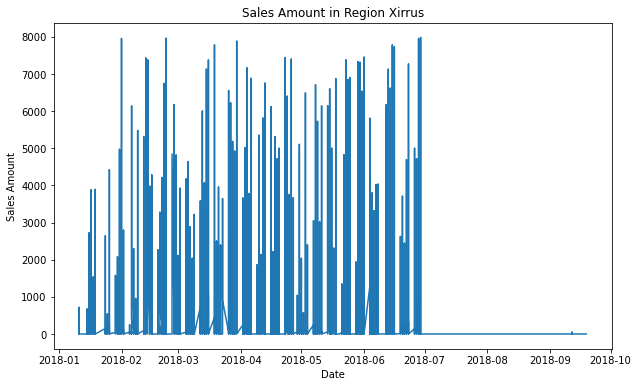

In [76]:
plt.figure(figsize=(10,6))
plt.title('Sales Amount in Region Xirrus')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.plot(df_Xirrus["Date"],df_Xirrus["Sales_Amount"]);
